In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
import os

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [13]:
%matplotlib inline

In [14]:
items_categ = pd.read_csv('all/item_categories.csv')
items = pd.read_csv('all/items.csv')
shops = pd.read_csv('all/shops.csv')
transactions = pd.read_csv('all/sales_train.csv')
test = pd.read_csv('all/test.csv')

In [68]:
test.shop_id = test.shop_id.astype('str')

test.item_id = test.item_id.astype('str')

In [72]:
crossCat =test[['shop_id','item_id']].apply(lambda s: "".join(s),axis=1)

In [8]:
transactions.date = pd.to_datetime(transactions.date,format="%d.%m.%Y")

In [9]:
transactionsPlus = transactions.merge(items,
                                      on = "item_id",
                                      sort=False).merge(items_categ,
                                                        on="item_category_id",
                                                        sort=False).merge(shops,
                                                                          on = 'shop_id',
                                                                          sort=False)

In [ ]:
transactionsPlus.shop_id = transactionsPlus.shop_id.astype('category')

transactionsPlus.item_id = transactionsPlus.item_id.astype('category')

transactionsPlus.item_name = transactionsPlus.item_name.astype('category')

In [208]:
transactionsPlus.item_cnt_day = transactionsPlus.item_cnt_day.astype('float')

In [ ]:
transactionsPlus['shopItemID'] =transactionsPlus[['shop_id','item_id']].apply(lambda s: ",".join(s),axis=1)

In [ ]:
a = transactionsPlus.groupby("shopItemID")

In [ ]:
sns.stripplot(x="shop_id",y="item_cnt_day",data=transactionsPlus,figsize=(10,10))

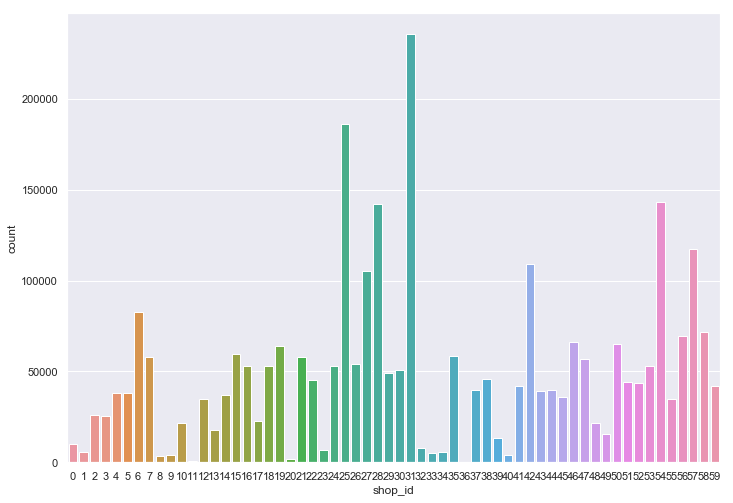

In [218]:
sns.countplot(transactionsPlus.shop_id)

KeyboardInterrupt: 

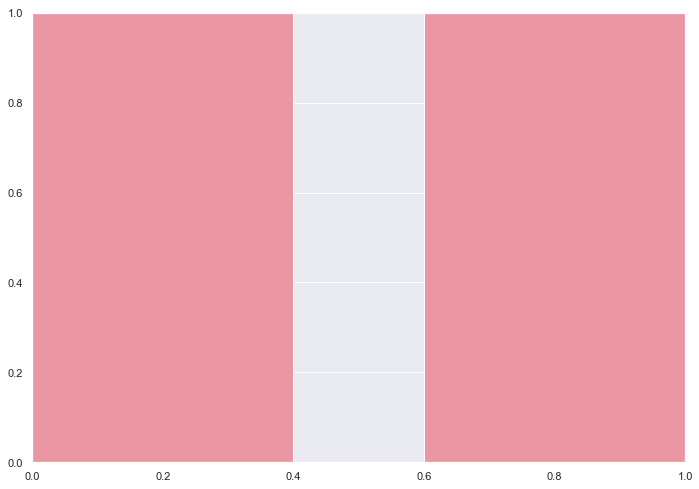

In [217]:
sns.countplot(transactionsPlus.item_id)

In [ ]:
import ipywidgets
import seaborn as sns

In [33]:
sns.set()

In [79]:
@ipywidgets.interact(i=(0,10000))
def plotGroup(i=0):
    temp = transactionsPlus.groupby("item_id").get_group(transactionsPlus.item_id.unique()[i]).item_price
    date = transactionsPlus.groupby("item_id").get_group(transactionsPlus.item_id.unique()[i]).date
    sns.scatterplot(date,temp,)
    
    

interactive(children=(IntSlider(value=0, description='i', max=10000), Output()), _dom_classes=('widget-interac…

In [ ]:
date = transactionsPlus.groupby("item_id").get_group(transactionsPlus.item_id.unique()[9]).date

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
RF = RandomForestClassifier(100,max_depth=10,verbose=True,n_jobs=2)

In [ ]:
RF.fit(transactionsPlus[["year","day","month","shop_id","item_id","item_price"]],
       transactionsPlus[["item_cnt_day"]].values)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [190]:
GB = GradientBoostingRegressor(min_samples_split=5,n_estimators=30)
GB.fit(transactionsPlus[["year","day","month","shop_id","item_id","item_price"]],
       transactionsPlus[["item_cnt_day"]].values)

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=5, min_weight_fraction_leaf=0.0,
             n_estimators=30, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [43]:
RegObj = DecisionTreeClassifier(max_depth=10)

In [44]:
transactionsPlus["year"] = transactionsPlus.date.dt.year
transactionsPlus["month"] = transactionsPlus.date.dt.month
transactionsPlus["day"] = transactionsPlus.date.dt.day

In [45]:
freq = transactionsPlus.item_cnt_day.value_counts()/len(transactionsPlus)

In [46]:
entro = -np.log(freq)

In [47]:
entro = entro/sum(entro)

In [48]:
ws = transactionsPlus.item_cnt_day.map(entro).values

In [49]:
RegObj.fit(transactionsPlus[["year","day","month","shop_id","item_id","item_price"]],
           transactionsPlus[["item_cnt_day"]].astype("category"),
           sample_weight=ws)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
RegObj.feature_importances_

array([0.02359674, 0.03165244, 0.06994648, 0.12713338, 0.23114275,
       0.51652822])

In [191]:
a = GB.predict(transactionsPlus[["year","day","month","shop_id","item_id","item_price"]])

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


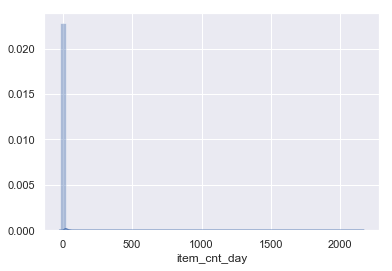

In [192]:
sns.distplot(transactionsPlus.item_cnt_day)

In [193]:
import ipywidgets

In [194]:
@ipywidgets.interact(i=(0,30000),j=(0,500))
def f(i,j):
    plt.plot(transactions.item_cnt_day.loc[i:i+j])
    plt.plot(a[i:i+j])
    plt.show()

interactive(children=(IntSlider(value=15000, description='i', max=30000), IntSlider(value=250, description='j'…

In [61]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [ ]:
dot_data = StringIO()

In [159]:
RegObj.tree_.n_node_samples

array([2935849,   36787,    4682, ...,       2,       1,       2])

In [176]:
export_graphviz(RegObj,impurity=True,proportion=True,feature_names=transactionsPlus.columns[[2,3,4,10,11,12]],
                out_file="test.dot",  
                filled=True, rounded=True,
                special_characters=True)

In [106]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

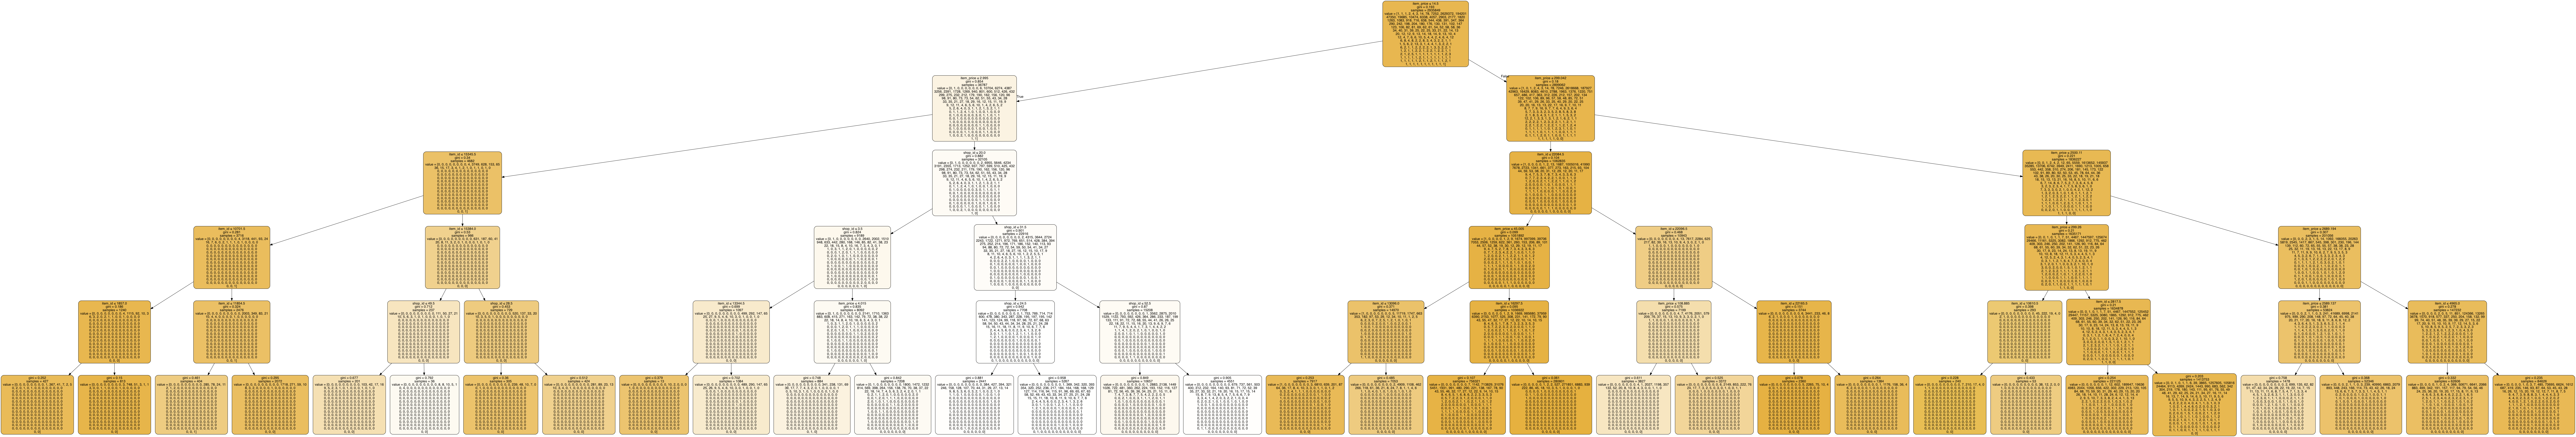

In [82]:
Image(graph.create_png())

In [180]:
transactions.columns[[2,3,4]]

Index(['shop_id', 'item_id', 'item_price'], dtype='object')

In [214]:
transactionsPlus.dtypes

date                  datetime64[ns]
date_block_num                 int64
shop_id                     category
item_id                     category
item_price                   float64
item_cnt_day                 float64
item_name                   category
item_category_id               int64
item_category_name            object
shop_name                     object
shopItemID                    object
dtype: object

In [1]:
from keras.models import Sequential

Using TensorFlow backend.
/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from keras.layers import Dense

In [34]:
model = Sequential()

In [35]:
model.add(Dense(input_shape=(4,),units=50,activation="relu"))

In [39]:
model.add(Dense(units=30,activation="relu"))

In [40]:
model.add(Dense(units=1,activation="sigmoid"))

In [41]:
model.compile(loss="mse",optimizer="adam")

In [ ]:
model.fit(transactionsPlus[["item_category_id","shop_id","item_price","item_id"]],transactionsPlus[["item_cnt_day"]],
          batch_size=30000,epochs=100)

In [101]:
transactionsPlus.head()

date  date_block_num shop_id item_id  item_price  item_cnt_day  \
0 2013-01-02               0      59   22154       999.0           1.0   
1 2013-04-26               3      59     944       150.0           1.0   
2 2013-06-26               5      59     944       199.5           1.0   
3 2013-07-20               6      59     944       199.5           1.0   
4 2013-09-14               8      59     944       299.0           2.0   

           item_name  item_category_id item_category_name  \
0  ЯВЛЕНИЕ 2012 (BD)                37     Кино - Blu-Ray   
1          2012 (BD)                37     Кино - Blu-Ray   
2          2012 (BD)                37     Кино - Blu-Ray   
3          2012 (BD)                37     Кино - Blu-Ray   
4          2012 (BD)                37     Кино - Blu-Ray   

                shop_name  year  month  day  
0  Ярославль ТЦ "Альтаир"  2013      1    2  
1  Ярославль ТЦ "Альтаир"  2013      4   26  
2  Ярославль ТЦ "Альтаир"  2013      6   26  
3  Ярославль ТЦ "Альтаир"  2013      7   20  
4  Ярославль ТЦ "Альтаир"  2013      9   14

In [100]:
@ipywidgets.interact(ID=(0,max(transactions.item_id)))
def f(ID=0):
    temp = transactions.groupby("item_id").get_group(ID)
    temp.plot("date","item_cnt_day",figsize=(10,10),title=items.loc[ID,"item_name"])
    temp.plot("date","item_price",figsize=(10,10),title=items.loc[ID,"item_name"])

interactive(children=(IntSlider(value=0, description='ID', max=22169), Output()), _dom_classes=('widget-intera…

In [103]:
items.loc[14836,"item_name"]

'МТГ(РУС): Драконы Таркира: Бустер арт. 853891'

**NOTE** Some products have different relations with time, some of them where big hits once and then decreased, others have a regular popularity

Maybe we can group products according to some time series measure

Maybe instead of days use buys per week might be more relevant (or sometimes peope buy more on weekends or something..)

Really have to find this time series distance and then use it on e.g. volume sold in stocks

**IDEA OF FEATURE**

Frequency of buying on last week or month (or how far do I have to go to have a number of day where buy = cte)

In [125]:
tr = transactions.loc[transactions.item_price != transactions.item_price.max()]

In [148]:
tr = tr.sort_values(by="date")
tr["mova"] =10* tr.item_price.rolling(10000).mean()

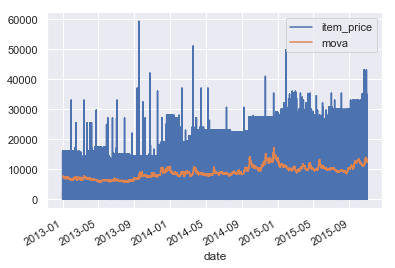

In [149]:
tr.plot("date",["item_price","mova"])

In [168]:
from sklearn.neural_network import MLPRegressor

In [178]:
MLP = MLPRegressor(hidden_layer_sizes=(50,20,1), activation="relu",batch_size = 30000)

In [ ]:
MLP.fit(transactionsPlus[["item_price","year","shop_id"]],transactionsPlus.item_cnt_day.values)

In [ ]:
transactions.loc[(transactions.item_id == 22154) & (transactions.shop_id == 0)]

In [15]:
from sklearn.preprocessing import Normalizer

In [37]:
a = Normalizer(norm="l1").fit_transform(transactions.item_price.values.reshape(1,-1))

In [38]:
sum(a[0])

0.9999999992378023

In [33]:
len(a[0])

2935849

In [36]:
sum(a[0])

1.0000000000020042